## Example: Using pytorch to perform principal component analysis (PCA)

References:
 - http://agnesmustar.com/2017/11/01/principal-component-analysis-pca-implemented-pytorch/
 - https://en.wikipedia.org/wiki/Principal_component_analysis    

In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

I will load up the sample dataframe that Eric made, and split it into background-only and signal-only subframes.

In [2]:
## load dataset
df = pd.read_pickle("../dataExamples/testDF.pkl")

# Get the numerical data only
background_array = df[df['isSignal'] == 0].to_numpy()[:,3:].astype(float)
signal_array = df[df['isSignal'] == 1].to_numpy()[:,3:].astype(float)

As per the definition on Wikipedia, PCA is an "orthogonal linear transform that transforms the data to a new coordinate system such that the greatest variance by some scalar projection of the data comes to lie on the first coordinate..." 

To perform PCA, we
 - shift the means of all the columns to 0, so the data is centered around the origin
 - compute the covariance matrix, $\Sigma$ of the data
 - calculate the eigenvalues and (normalized) eigenvectors of $\Sigma$

In [3]:
def PCA(data, num_components=2):
    X = torch.from_numpy(data) # Create pytorch tensor
    X_mean = torch.mean(X, 0) # Calculate mean of all the columns
    X = X - X_mean.expand_as(X) # Broadcast to subtract the row of means from each row

    # Perform a singular value decomposition, and return the linear transform with
    # the original matrix and num_components eigenvectors
    U, S, V = torch.svd(torch.t(X))
    return torch.mm(X, U[:, :num_components])

Do PCA and plot relationships between pairs of components. 

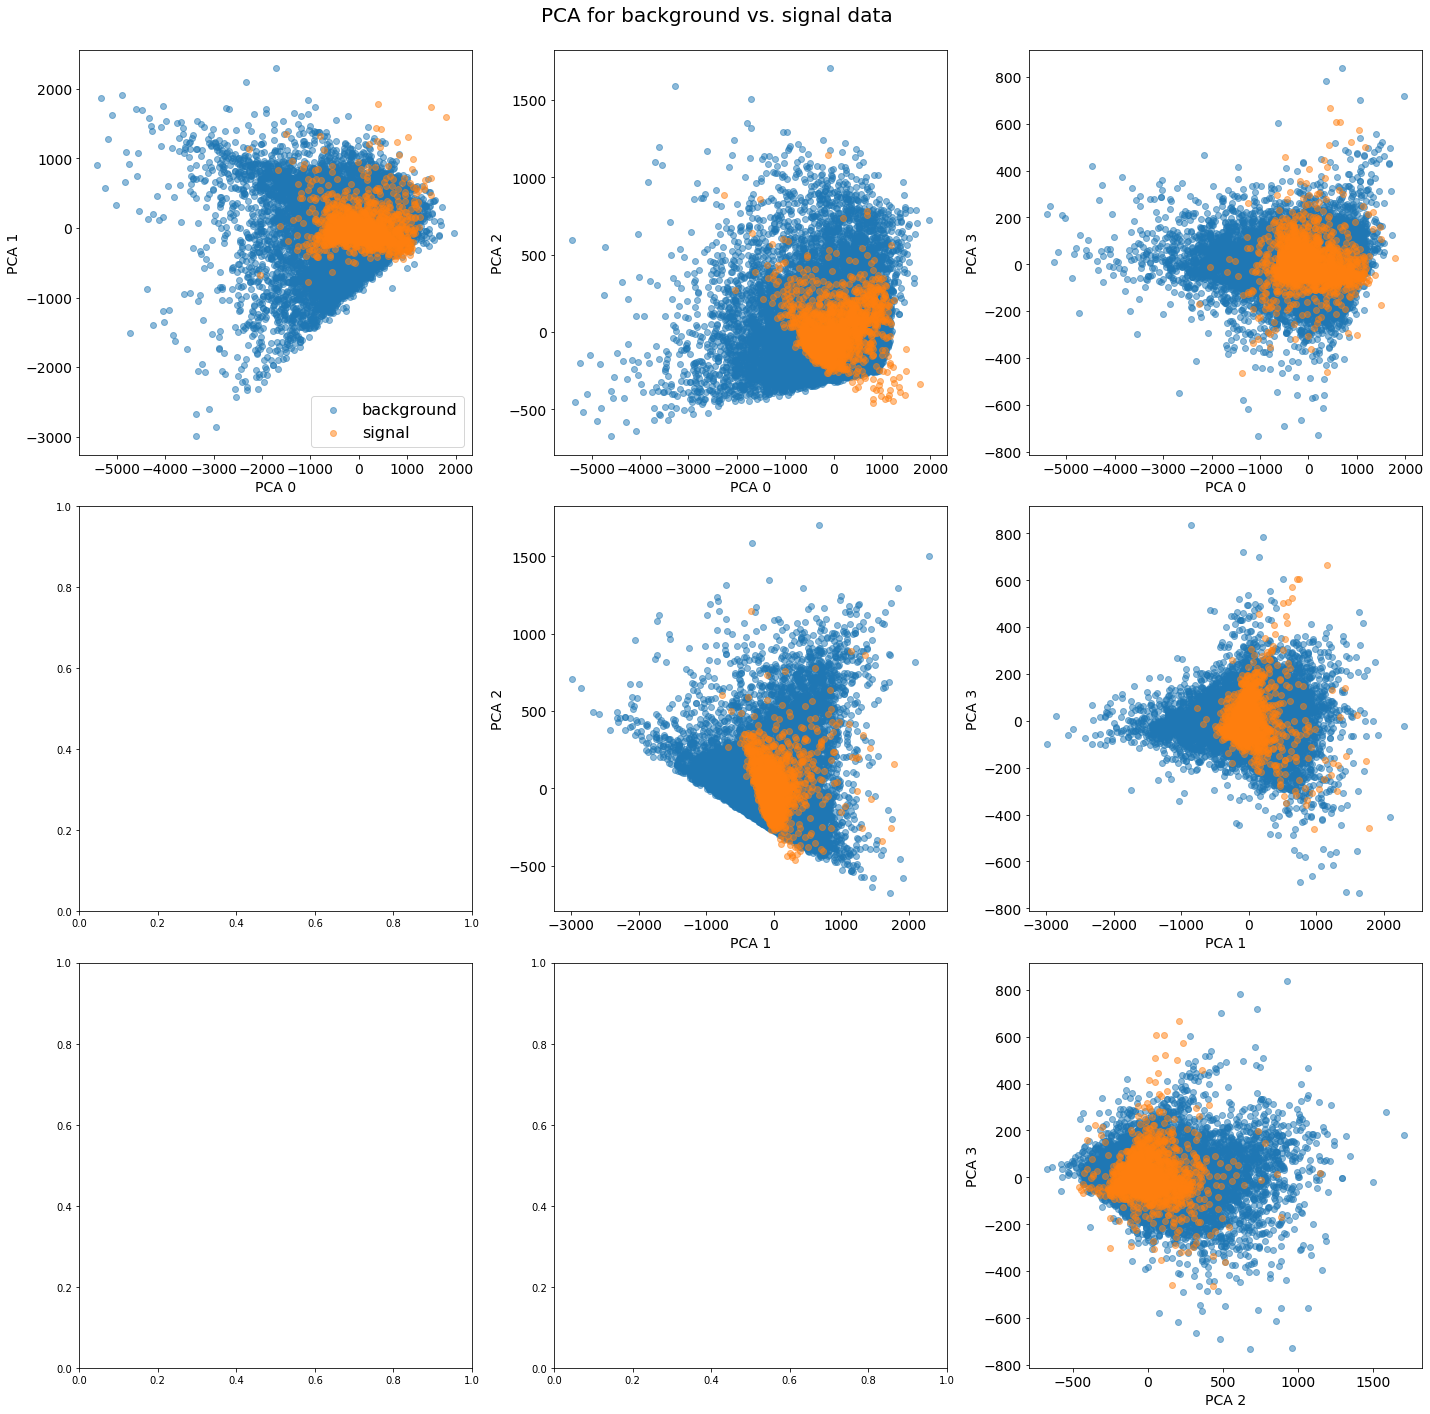

In [4]:
num_components = 4

fig, ax = plt.subplots(num_components - 1, num_components - 1, figsize=(5*num_components, 5*num_components))

background_pca = PCA(background_array, num_components)
signal_pca = PCA(signal_array, num_components)

for component_1 in range(num_components):
    for component_2 in range(component_1 + 1, num_components):
            this_ax = ax[component_1, component_2 - 1]
            this_ax.scatter(background_pca[:, component_1], background_pca[:, component_2], alpha=0.5, label='background')
            this_ax.scatter(signal_pca[:, component_1], signal_pca[:, component_2], alpha=0.5, label='signal')
            this_ax.set_xlabel(f"PCA {component_1}", fontsize=14)
            this_ax.set_ylabel(f"PCA {component_2}", fontsize=14)
            this_ax.xaxis.set_tick_params(labelsize=14)
            this_ax.yaxis.set_tick_params(labelsize=14)
            
fig.suptitle("PCA for background vs. signal data", fontsize=20)
ax[0, 0].legend(fontsize=16)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
#plt.savefig("pca.png")
plt.show()